In [32]:
#importing librarires

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [33]:
#data read

data = pd.read_excel('wards.xlsx')
print(data)

    x   y
0   4   4
1   8   4
2  15   8
3  24   4
4  24  12


In [34]:
#datapoint gulo ekta list a convert korsi ei part tuku te

x_values = data['x'].tolist()
y_values = data['y'].tolist()


X = [[x, y] for x, y in zip(x_values, y_values)]

print('X=' ,X)

X= [[4, 4], [8, 4], [15, 8], [24, 4], [24, 12]]


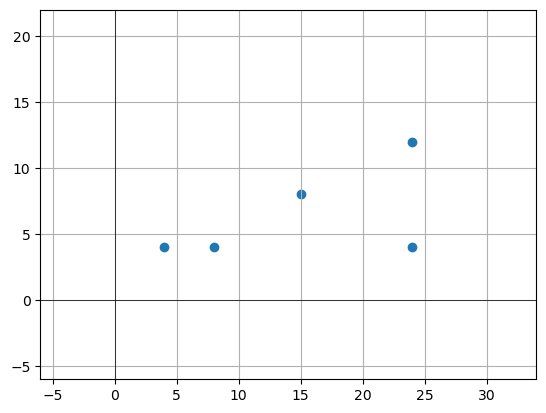

In [35]:
#plotting the datapoint before clustering

x = data['x']
y = data['y']
plt.scatter(x, y)
plt.grid(True)
plt.xlim(min(x) - 10, max(x) + 10)
plt.ylim(min(y) - 10, max(y) + 10)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

# Display grid lines at every unit
# plt.xticks(range(int(min(x)) - 10, int(max(x)) + 11))
# plt.yticks(range(int(min(y)) - 10, int(max(y)) + 11))

In [36]:
#wards method starts here

def ward_clustering(X):
    n = X.shape[0]
    clusters = [[i] for i in range(1, n+1)]
    while len(clusters) > 1:
        min_error = np.inf
        merge_index = (0, 0)
        for i in range(len(clusters)):
            for j in range(i+1, len(clusters)):
                error = np.sum((X[np.array(clusters[i])-1][:, None] - X[np.array(clusters[j])-1][None, :])**2)
                if error < min_error:
                    min_error = error
                    merge_index = (i, j)
        clusters.append(clusters[merge_index[0]] + clusters[merge_index[1]])
        del clusters[merge_index[1]]
        del clusters[merge_index[0]]
        variances = []
        for c in clusters:
            mean = np.mean(X[np.array(c)-1], axis=0)
            var = np.sum((X[np.array(c)-1] - mean)**2)
            variances.append(var)
        print(f"Clusters: {clusters}, Variances: {variances}, Error: {min_error}")
    return clusters

X = np.array(X)
ward_clustering(X)


Clusters: [[3], [4], [5], [1, 2]], Variances: [0.0, 0.0, 0.0, 8.0], Error: 16
Clusters: [[3], [1, 2], [4, 5]], Variances: [0.0, 8.0, 32.0], Error: 64
Clusters: [[1, 2], [3, 4, 5]], Variances: [8.0, 86.0], Error: 194
Clusters: [[1, 2, 3, 4, 5]], Variances: [383.20000000000005], Error: 1642


[[1, 2, 3, 4, 5]]

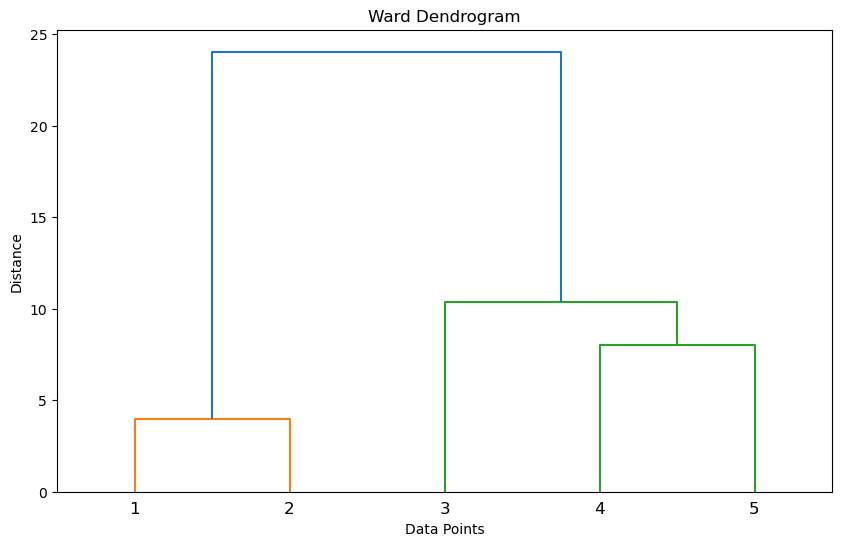

In [37]:
def ward_dendrogram(data, labels):
    linkage_matrix = linkage(data, method='ward')
    plt.figure(figsize=(10, 6))
    dendrogram(linkage_matrix, labels=labels)
    plt.xlabel('Data Points')
    plt.ylabel('Distance')
    plt.title('Ward Dendrogram')
    plt.show()

labels = np.arange(1, len(X) + 1)
ward_dendrogram(X, labels)







